## Problem Statement:

The objective is to assess the collective sentiment of viewers across different YouTube videos. Specifically, I aim to determine whether the overall sentiment is predominantly positive, negative, or neutral.

## Loading Data

In [ ]:
#import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# This code reads a CSV file named 'UScomments.csv' located at the specified path,
# and it uses pandas' 'pd.read_csv' function. The 'error_bad_lines=False' parameter
# indicates that any lines with errors in the CSV file will be skipped during reading.

comments = pd.read_csv('/content/drive/MyDrive/Job Projects /UScomments.csv', error_bad_lines = False)

<ipython-input-101-d08759544d26>:5: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

<ipython-input-101-d08759544d26>:5: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Cleaning Data


In [ ]:
comments.shape

(691400, 4)

In [ ]:
# Provide a concise summary of the DataFrame
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [ ]:
 # We will need to change this to a string later, when performing WordCloud Analysis

type(comments['comment_text'])

pandas.core.series.Series

In [ ]:
# Checking for NULLs

comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [ ]:
# This code removes rows with missing (NaN) values
comments.dropna(inplace=True)

In [ ]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Perform Sentiment Analysis

How it works:

1. We will utilize a widely-used package called "textblob" to analyze the sentiment of text data within the "comment" column of our dataset. This analysis will provide us with two key metrics: polarity and intensity.
2. Polarity measures the sentiment of the comment, with values closer to "0" indicating a more neutral sentiment.
3. An intensity value closer to "+1" signifies a more positive sentiment within the comment.
4. Conversely, an intensity value closer to "-1" indicates a more negative sentiment expressed in the comment.

In [ ]:
from textblob import TextBlob

In [ ]:
# This code calculates the sentiment polarity for each comment in the 'comment_text' column of the DataFrame 'comments'.
# It iterates through the comments, using TextBlob to analyze the sentiment of each comment and appends the polarity score to the 'polarity' list.
# If there is an error during sentiment analysis (e.g., due to a non-text comment), it appends a neutral score of 0.

polarity = []

for i in comments['comment_text']:
  try:
    polarity.append(TextBlob(i).sentiment.polarity)
  except:
    polarity.append(0)


In [ ]:
len(polarity)

691375

In [ ]:
# Add polarity as a column to the existing Dataframe

comments['polarity'] = polarity

In [ ]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## Perform Wordcloud Analysis

Aim: To create a word cloud visually showing the frequency and importance of positive and negative comments.

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Separate positive and negative comments

p_filter = comments['polarity'] == 1
n_filter = comments['polarity'] == -1

positive_comments = comments[p_filter]
negative_comments = comments[n_filter]

In [ ]:
# This code combines all the text from positive comments into a single string.

total_pos_comments = ' '.join(positive_comments['comment_text'])


In [ ]:
# This code combines all the text from negative comments into a single string.

total_neg_comments = ' '.join(negative_comments['comment_text'])

In [ ]:
# This code creates a WordCloud visualization from a given text dataset using the WordCloud library.
# It utilizes a set of predefined stopwords (common words like 'and', 'the', 'in' that are often excluded in text analysis)
# to filter out common words from the word cloud visualization.

pos_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_pos_comments)

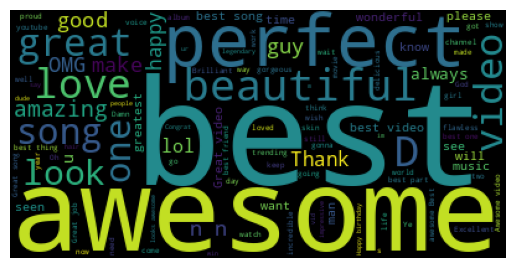

In [ ]:
 plt.imshow(pos_wordcloud)
 plt.axis('off');

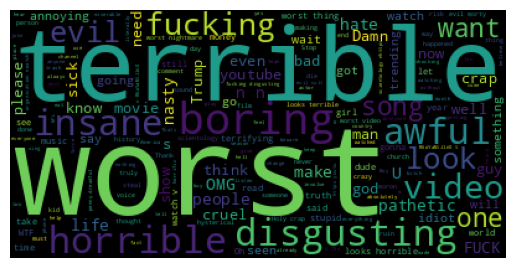

In [ ]:
# Showcase the WordCloud for the negative comments

neg_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_neg_comments)
plt.imshow(neg_wordcloud)
plt.axis('off');

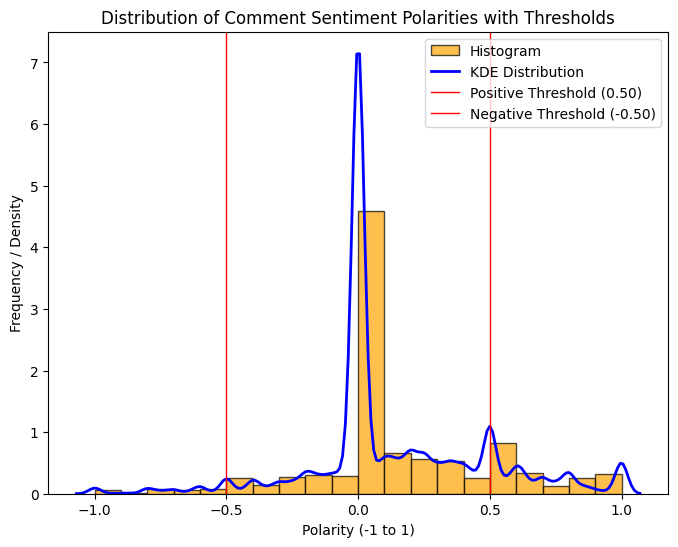

Percentage of comments with polarity > 0.50: 13.13%
Percentage of comments with polarity < -0.50: 2.67%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of polarities
plt.figure(figsize=(8, 6))
plt.hist(comments['polarity'], bins=20, range=(-1, 1), edgecolor='black', alpha=0.7, density=True, label='Histogram', color='orange')
sns.kdeplot(comments['polarity'], color='blue', linewidth=2, label='KDE Distribution')

# Add lines at 0.50 and -0.50
plt.axvline(x=0.50, color='red', linestyle='-', linewidth=1, label='Positive Threshold (0.50)')
plt.axvline(x=-0.50, color='red', linestyle='-', linewidth=1, label='Negative Threshold (-0.50)')

# Calculate the percentage below the thresholds
positive_percentage = (comments['polarity'] > 0.50).mean() * 100
negative_percentage = (comments['polarity'] < -0.50).mean() * 100

plt.legend()
plt.xlabel('Polarity (-1 to 1)')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Comment Sentiment Polarities with Thresholds')
plt.show()

print(f'Percentage of comments with polarity > 0.50: {positive_percentage:.2f}%')
print(f'Percentage of comments with polarity < -0.50: {negative_percentage:.2f}%')


1. **Bimodal Sentiment Distribution:** The distribution appears to be bimodal, with two distinct peaks around the negative and positive thresholds. This suggests that the comments tend to be polarized, with a concentration of opinions that are either positively or negatively charged, rather than neutral.
2. **Skew Towards Positive Sentiment:** The peak near the positive threshold is more pronounced than the one near the negative threshold. This indicates that there may be a higher frequency of positive comments compared to negative ones for the videos analyzed.

## Perform Emoji Analysis

In the context of YouTube, where viewer communication tends to be emotive and informal, conducting an emoji analysis is invaluable for a deeper understanding of sentiment. Unlike professional platforms like LinkedIn, YouTube comments frequently incorporate emojis to convey emotions. Recognizing these platform-specific nuances is essential for accurate sentiment assessment.

In [ ]:
import emoji
from collections import Counter

In [ ]:
# This code iterates through the 'comment_text' column of the DataFrame 'comments' character by character.
# It checks if each character is an emoji by searching it in the emoji data provided by the 'emoji' library.
# If a character is found to be an emoji, it is added to the 'list_of_emojis.'

list_of_emojis = []

for i in comments['comment_text']:
  for char in i:
    if char in emoji.EMOJI_DATA:
      list_of_emojis.append(char)

In [ ]:
# Print the frequency of the top 10 emojis

Counter(list_of_emojis).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [ ]:
# Store the frequency and emojis in a separate list

emojis = [Counter(list_of_emojis).most_common(10)[i][0] for i in range(10)]
freqs = [Counter(list_of_emojis).most_common(10)[i][1] for i in range(10)]

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
# Graph the emoji data with it's corresponding frequency

# Create a bar chart
trace = go.Bar(x=emojis, y=freqs)

# Layout configuration
layout = go.Layout(
    title=dict(
        text='Top 10 Emojis Used Across All Videos',
        x=0.5,  # Set x to 0.5 for centering
        y=0.9
    ),
    xaxis=dict(title='Emojis'),
    yaxis=dict(title='Frequency')
)


fig = go.Figure(data=[trace], layout=layout)

# Display the interactive plot using iplot
iplot(fig)


1. **Dominant Laughing Emoji:** The laughing emoji with tears is the most frequently used across video comments, indicating that humor or amusement is a prevalent reaction.
2. **Frequent Use of Heart and Flames:** The heart and flames emojis also feature prominently, which could suggest a strong expression of love or liking, and in the case of the flames, possibly excitement or that something is 'hot' or trending.
3. **Variety in Emoji Usage:** Although the laughing emoji is predominant, there is a variety of emojis being used, reflecting a range of emotional responses from the viewership. This includes emojis representing love, appreciation (clapping hands), surprise or shock (wide-eyed face), and others that may express support or affection (e.g., hearts).

## Conclusion




The sentiment within the comments is primarily neutral, given the substantial peak in the middle of the polarity distribution. This suggests that the majority of viewers may be commenting in a way that is neither strongly positive nor strongly negative.

Despite the prevalence of neutral sentiment, there is a clear tendency towards positivity, as evidenced by the second most prominent peak in the positive range of the sentiment distribution and the frequent use of positive emojis.

Also, a relatively smaller peak in the negative range of the sentiment distribution indicates that negative sentiments are present but less common compared to positive sentiments.

In conclusion, while the overall sentiment leans towards neutral based on the sentiment polarity distribution, the usage of emojis suggests a positive undertone in the viewers' engagement. The data points to a viewer base that, when expressing a clear sentiment, tends to do so positively rather than negatively.

## Future Considerations

In the future, I intend to enhance sentiment analysis by:

1. Employing text classification models, including Natural Language Processing (NLP) classifiers, to categorize comments into precise sentiment categories—positive, negative, or neutral—with increased accuracy. This approach aims to provide a more granular understanding of viewer sentiment.
2. Exploring emotion detection techniques to discern specific emotional tones conveyed in comments, surpassing the limitations of basic positive or negative sentiment analysis. By identifying nuanced emotional expressions, I aim to bolster the precision and confidence in our sentiment analysis conclusions, whether affirming or challenging them.